# Background
In this section we introduce methods of measuring precision - number of significant digits, absolute and relative error. We also encourage the reader to use absolute error in order to be most precise.

## Significant Digits

The number of significant digits may be imprecise

In [ ]:
# Definition 1: Round down to p-sig. digit number
x  = 0.90
x1 = 0.99 # 2 correct significant digit, actual difference 0.09
x2 = 0.89 # 1 correct significant digit, actual difference 0.01

In [ ]:
# Definition 2: Round to nearest p-sig. digit number
y  = 0.9951 # --> 0.10
y1 = 0.9499 # --> 0.90 , only 1 correct sig. digit
y2 = 1.0000 # --> 0.10 , 3 correct sig. digits

The last definition avoids issues that the previous two had, but it's still non-ideal

In [ ]:
# Definition 3: Numbers x and x' match to p-sig. digits if x - x' < half a unit in p-th sig. digit of x
x1 = 0.123
x2 = 0.127
# 0.004 < (0.01 / 2) => x1 and x2 match in 2 significant digits according to this definition wchich may be slightly confusing 

## Absolute and relative error

In [52]:
def absolute_error(true_value, approx_value):
    return abs(true_value - approx_value)

print 'Absolute error: {0:.9f}'.format(absolute_error(10.951, 10.949))

def relative_error(true_value, approx_value):
    return absolute_error(true_value, approx_value) / abs(true_value)

print 'Relative error: {0:.9f}'.format(relative_error(10.951, 10.949))

Absolute error: 0.002000000
Relative error: 0.000182632


### Relative Error for Non-Scalars
For non-scalars, calculating normalized value *||x|| = max / sum*, implies smaller components of **x** are bound by absolute error only. Consider compensative relative error: *max(i) |xi - xi’| / |xi|*, which puts all components on equal footing.

In [ ]:
import numpy as np

def relative_error(true_value, approx_value):
    return np.max(np.fabs((true_value - approx_value) / true_value))

x_value = np.array([10000, 0.01])
x_approx = np.array([9999, 0.02])
                   
print relative_error(x_value, x_approx)

# Sources of Error

## Truncation error (discretization error)
Error coming from representing a function or continuous variable using finite number of evaluations - outside of scope of this notebook, mentioned for completeness only.

## Round-off error
* Difference between calculated approximation and exact value due to rounding
* Related to representation error, which is due to representing numbers with finite number of digits

In [76]:
import numpy as np
x = np.float64(0.1)
y = np.float32(0.1)
print '32- vs 64-bit representation difference:', abs(x - y)

32- vs 64-bit representation difference: 1.49011611383e-09


### Rounding Multiple Times Can Accumulate Error

In [ ]:
import numpy as np
# For explanation why we we use np.round rather than default Python 2.7.3 round function, see below
x = 9.945309 
print np.round(x, 2), np.round(np.round(x, 2), 1)
print np.round(x, 1)

#### (Optional) Differences between round and np.round

There are few differences between built-in Python 2.7 round function and numpy (a)round:

* The built in function rounds away from zero
* Numpy round rounds to even, which tends to skew the results less and is a commonly accepted rounding method
* From my (limited) exerience it looks numpy round is much better behaved in dealing with decimal-to-binary float rounding errors

Note that Python 3 has a different round function that behaves more similarly to numpy round.

In [47]:
import numpy as np
for i in range(13):
    x = -3 + 0.5 * i
    print '\t{0:5.1f}\t{1:5.1f}\t{2:5.1f}'.format(x, round(x), np.round(x))

	 -3.0	 -3.0	 -3.0
	 -2.5	 -3.0	 -2.0
	 -2.0	 -2.0	 -2.0
	 -1.5	 -2.0	 -2.0
	 -1.0	 -1.0	 -1.0
	 -0.5	 -1.0	  0.0
	  0.0	  0.0	  0.0
	  0.5	  1.0	  0.0
	  1.0	  1.0	  1.0
	  1.5	  2.0	  2.0
	  2.0	  2.0	  2.0
	  2.5	  3.0	  2.0
	  3.0	  3.0	  3.0


## Loss of significance
Error in floating point arithmetic when an operation increases relative error substantially more than absolute error

In [78]:
x_value = 0.123123
y_value = 0.123000
# We want to learn the value of d = x - y:
d_value = x_value - y_value
print 'Actual d value:', 
# Assuming we're apprximating above calculation with a 4 decimal digits precision:
import numpy as np
d_approx = np.round(x_value, 4) - np.round(y_value, 4)
print 'Approx d value:', d_approx
print 'Absolute error: {0:.9f}'.format(abs(d_value - d_approx))
print 'Relative error: {0:.9f}'.format(abs((d_value - d_approx) / d_value))

Actual d value: Approx d value: 0.0001
Absolute error: 0.000023000
Relative error: 0.186991870


## Precision vs Accuracy
* Precision is the accuracy of basic arithmetic operations used in the computation
* Accuracy is the absolute or relative error of the approximate quantity
* NOTE: Accuracy is not limited by precision, finite precision arithmetic can simulate any precision with more computation

## Backward and Forward Errors
* Forward error - error of the computed value
* Backward error:
  * Let y = f(x), given x we approximate f(x) with y’
  * Let dx be the smallest quantity where y’ = f(x + dx) in exact computation
  * Then dx is the backward error
* Benefits of using backward error:
  * Unifies error w/ perturbation in the data
  * Removes the need to calculate forward error
* Forward-backward error:
  * f(x + dx) = y + dy
  * Used to define stability of computation where just using backward error isn’t possible, e.g. sin, cos
* **If rounding errors are dominant source of errors, we call an algorithm numerically stable if it is stable in forward-backward error sense**

## Condition Number
* Condition number of a function with respect to its arguments is used to measure how how much the output of the function will change for a small change in the input
* As a rule of thumb, if the condition number kappa(A) = 10^k, then you may lose up to k digits of accuracy on top of what would be lost to the numerical method due to loss of precision from arithmetic methods
* A problem with a low condition number is said to be well-conditioned, while a problem with a high condition number is said to be ill-conditioned
* For example, the condition number associated with the linear equation Ax = b gives a bound on how inaccurate the solution x will be after approximation. Note that this is before the effects of round-off error are taken into account; conditioning is a property of the matrix, not the algorithm or floating point accuracy of the computer used to solve the corresponding system.

### Finding Roots of a Polynomial
Finding roots of a polynomial is not a well-conditioned problem, let's look at Wilkinson’s polynomial as an example.

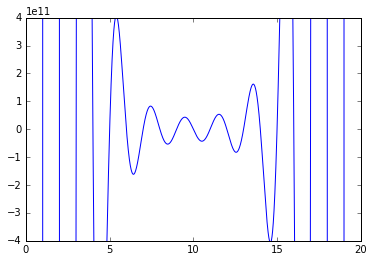

In [71]:
# Wilkinson's polynomial is defined as p(x) = (x - 1)(x - 2)...(x - 20)
import numpy as np
x = np.linspace(0, 20, 4000)
y = 1
for i in range(1, 20):
    y *= (x - i)
import matplotlib.pyplot as plt
%matplotlib inline
plt.ylim([-4e11, 4e11])
plt.plot(x, y)

Quoting Wikipedia:
* *"If the coefficient of x19 is decreased from −210 by 2−23 to −210.0000001192, then the polynomial value w(20) decreases from 0 to −6.25×10^17, and the root at x = 20 grows to x ≈ 20.8. The roots at x = 18 and x = 19 collide into a double root at x ≈ 18.62 which turns into a pair of complex conjugate roots at x ≈ 19.5±1.9i as the perturbation increases further."*
* *"Wilkinson's polynomial is often used to illustrate the **undesirability of naively computing eigenvalues of a matrix by first calculating the coefficients of the matrix's characteristic polynomial** and then finding its roots, since using the coefficients as an intermediate step may introduce an extreme ill-conditioning even if the original problem was well conditioned"*

In [ ]:
import numpy as np
x = np.float64(0.1)
y = np.float32(0.1)
print 'Relative error: ', abs(x - y)
print 'Absolute error: ', abs(x - y) / abs(x)

<h1>Cancellation examples</h1>

In [ ]:
from math import sin, cos

near_zero = 1.2e-8

def f(x):
    return (1 - cos(x)) / x**2
print f(near_zero)

# Rewrite f(x) as g(x) (meaning f(x) == g(x)):
def g(x):
    return 0.5 * (2 * sin(x / 2) / x)**2

print g(near_zero)

# for i in range(1, 101):
#     val = i * 0.1
#     print f(val) - g(val)

Summing numbers: https://docs.python.org/2/library/math.html https://en.m.wikipedia.org/wiki/Kahan_summation_algorithm
Interestingly, IPython Notebook appears to do the right thing by default, what?
IPython session:

In [6]: from math import fsum

In [7]: sum([0.1] * 10) Out[7]: 0.9999999999999999

In [8]: fsum([0.1] * 10) Out[8]: 1.0

In [ ]:
from math import fsum
print sum([0.1] * 10)
print fsum([0.1] * 10)

<h1>Calculations without subtractions are fine, right?</h1>

In [ ]:
def naive_e(n):
    return (1 + 1.0 / n)**n

from math import exp
e = exp(1)

for i in range(5, 20):
    print naive_e(10**i) - e

In [ ]:
from math import sqrt
def identity(x, n):
    for i in xrange(n):
        x = sqrt(x)
    for i in xrange(n):
        x = x**2
    return x

x = 2
for i in xrange(35, 60):
    print x - identity(x, i)

In [ ]:
from math import fsum, pi

def basel1(n):
    r = 0
    for i in xrange(n):
        r += 1.0 / (i + 1)**2
    return r

def basel2(n):
    r = 0
    for i in reversed(xrange(n)):
        r += 1.0 / (i + 1)**2
    return r

def basel3(n):
    return sum(1.0 / (i + 1)**2 for i in xrange(n))

def basel4(n):
    return fsum(1.0 / (i + 1)**2 for i in xrange(n))
        
x = pi**2 / 6
n = 1000000

print x - basel1(n)
print x - basel2(n)
print x - basel3(n)
print x - basel4(n)

<h1>Sometimes the rounding errors cancel out and produce a result more accurate than the intermediate calculations</h1>

In [ ]:
# Computing f(x) = (exp(x) - 1) / x == sum(x^i / (i + 1)!)

from math import exp, log

def f1(x):
    if 0 == x:
        return 1
    return (exp(x) - 1) / x

def f2(x):
    if 0 == x:
        return 1
    y = exp(x)
    return (y - 1) / log(y)

# f(epsilon) ~= 1
for i in range(8, 15):
    print abs(1 - f1(1.0 / (10**i))), abs(1 - f2(1.0 / (10**i)))
    
# NOTE: Above doesn't hold if we calculate for powers of 2!
# for i in range(30, 40):
#     print abs(1 - f1(1.0 / (2**i))), abs(1 - f2(1.0 / (2**i)))

<h1>Rounding errors are not random</h1>

In [ ]:
import numpy as np

def r(x):
    # Calculate value of a rational function using Horner's rule (https://en.wikipedia.org/wiki/Horner%27s_method)
    # More on the function can be looked up on Wolfram's Alpha:
    # http://www.wolframalpha.com/input/?i=f(x)+%3D+(622.0+-+x+*+(751.0+-+x+*+(324.0+-+x+*+(59.0+-+4+*+x))))+%2F+(112+-+x+*+(151+-+x+*+(72+-+x+*+(14+-+x))))&t=crmtb01
    p = 622.0 - x * (751.0 - x * (324.0 - x * (59.0 - 4 * x)))
    q = 112 - x * (151 - x * (72 - x * (14 - x)))
    return p / q

def calc_f(a):
    t = np.array([a + k * 2**-52 for k in xrange(400)])
    t = r(t)
    t -= t[0]
    t *= 1.0 / max(abs(t))
    return t

import matplotlib.pyplot as plt
%matplotlib inline

def plot(t):
    plt.plot(t, linestyle='--', marker='o')
    plt.show()
    
for a in [1.606, 4, 8, 16, 32]:
    plot(calc_f(a))

<h1>Designing stable algorithms</h1>

0. **Try to avoid subtracting quantities contaminated by error** (though such subtractions may be unavoidable)
0. **Minimize the size of intermediate quantities relative to the finalsolution**
    0. Otherwise the final answer may be the result of damaging subtractive cancellation
    0. See Gaussian elimination or recursive summation
0. **Look for different formulations of a computation that are mathematically but not numerically equivalent**
    0. The classical Gram-Schmidt method is unstable, but a trivial modification produces the stable modified Gram-Schmidt (MGS) method
    0. There are two ways of using the MGS method to solve a least squares problem, the more obvious of which is unstable.
0. **It is advantageous to express update formulae as:**  
***new_value = old_value + small_correction***  
**if the small correction can be computed with many correct significant figures**  
Numerical methods are often naturally expressed in this form, examples include
    0. Methods for solving ordinary differential equations, where the correction is proportional to a stepsize
    0. Newton's method for solving a nonlinear system
    0. A classic example of the use of this update strategy is in iterative refinement for improving the computed solution to a linear system:  
Ax = b  
    in which by computing residuals r = b - Ay in extended precision and solving update equations that have the residuals as right-hand sides a highly accurate solution can be computed
0. **Use only well-conditioned transformations of the problem**
     0. In matrix computations this amounts to multiplying by orthogonal matrices instead of nonorthogonal, and possibly, ill-conditioned matrices, where possible
0. **Take precautions to avoid unnecessary overflow and underflow**